# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##**Lorrayne Somerlatte dos Santos**###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# YOUR CODE HERE
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 10)),
              ('rf', RandomForestClassifier(n_estimators = 50))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('rf: ' + str(rf.score(X_train, y_train)))


rf: 1.0


In [ ]:
y_rf_pred = rf.predict(X_test)

for i, j in zip([y_rf_pred],
                ['rf']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

rf
accuracy_score: 0.965034965034965
precision_score: 0.967032967032967
recall_score: 0.9777777777777777
f1_score: 0.9723756906077348



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[50,  3],
       [ 2, 88]])

In [ ]:
################################################################################################

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 10)),
              ('rf', RandomForestClassifier(n_estimators = 100))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('rf: ' + str(rf.score(X_train, y_train)))


rf: 1.0


In [ ]:
y_rf_pred = rf.predict(X_test)

for i, j in zip([y_rf_pred],
                ['rf']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

rf
accuracy_score: 0.958041958041958
precision_score: 0.9565217391304348
recall_score: 0.9777777777777777
f1_score: 0.967032967032967



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[49,  4],
       [ 2, 88]])

In [ ]:
###################################################################################

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 10)),
              ('rf', RandomForestClassifier(n_estimators = 150))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('rf',
                                RandomForestClassifier(n_estimators=150))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('rf: ' + str(rf.score(X_train, y_train)))


rf: 1.0


In [ ]:
y_rf_pred = rf.predict(X_test)

for i, j in zip([y_rf_pred],
                ['rf']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

rf
accuracy_score: 0.958041958041958
precision_score: 0.9565217391304348
recall_score: 0.9777777777777777
f1_score: 0.967032967032967



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[49,  4],
       [ 2, 88]])

In [ ]:
##################################################################################

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 10)),
              ('rf', RandomForestClassifier(n_estimators = 200))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('rf: ' + str(rf.score(X_train, y_train)))


rf: 1.0


In [ ]:
y_rf_pred = rf.predict(X_test)

for i, j in zip([y_rf_pred],
                ['rf']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

rf
accuracy_score: 0.958041958041958
precision_score: 0.9565217391304348
recall_score: 0.9777777777777777
f1_score: 0.967032967032967



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[49,  4],
       [ 2, 88]])

# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 10)),
              ('rf', RandomForestClassifier(n_estimators = 200))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('knn: ' + str(knn.score(X_train, y_train)))


knn: 0.9413145539906104


In [ ]:
y_knn_pred = knn.predict(X_test)

for i, j in zip([y_knn_pred],
                ['knn']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

knn
accuracy_score: 0.9300699300699301
precision_score: 0.925531914893617
recall_score: 0.9666666666666667
f1_score: 0.9456521739130436



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[46,  7],
       [ 3, 87]])

In [ ]:
#########################################################################################################33

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 100)),
              ('rf', RandomForestClassifier(n_estimators = 200))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=100)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('knn: ' + str(knn.score(X_train, y_train)))


knn: 0.9061032863849765


In [ ]:
y_knn_pred = knn.predict(X_test)

for i, j in zip([y_knn_pred],
                ['knn']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

knn
accuracy_score: 0.8811188811188811
precision_score: 0.8613861386138614
recall_score: 0.9666666666666667
f1_score: 0.9109947643979057



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[39, 14],
       [ 3, 87]])

In [ ]:
###########################################################################################################################

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 50)),
              ('rf', RandomForestClassifier(n_estimators = 200))]
stack = StackingClassifier(estimators = estimators,
                           final_estimator = LogisticRegression(),
                           cv = 5)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200))],
                   final_estimator=LogisticRegression())

In [ ]:
knn = stack.estimators_[0]
rf = stack.estimators_[1]

In [ ]:
print('knn: ' + str(knn.score(X_train, y_train)))


knn: 0.9225352112676056


In [ ]:
y_knn_pred = knn.predict(X_test)

for i, j in zip([y_knn_pred],
                ['knn']):
    print(j)
    print('accuracy_score: ' + str(accuracy_score(y_test, i)))
    print('precision_score: ' + str(precision_score(y_test, i)))
    print('recall_score: ' + str(recall_score(y_test, i)))
    print('f1_score: ' + str(f1_score(y_test, i)))
    print()

knn
accuracy_score: 0.8951048951048951
precision_score: 0.8787878787878788
recall_score: 0.9666666666666667
f1_score: 0.9206349206349207



In [ ]:
confusao = confusion_matrix(y_test, i)
confusao

array([[41, 12],
       [ 3, 87]])

# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

In [ ]:
from matplotlib import pyplot as plt

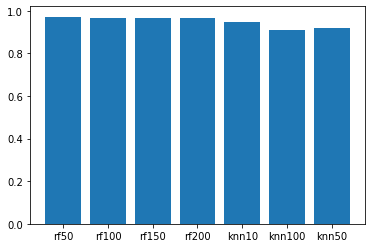

In [ ]:
F1 = ['rf50', 'rf100', 'rf150', 'rf200', 'knn10', 'knn100', 'knn50']
valores = [0.9723756906077348, 0.967032967032967, 0.967032967032967, 0.967032967032967, 0.9456521739130436, 0.9109947643979057, 0.9206349206349207]
plt.bar(F1, valores)
plt.show()

É possível notar uma variação suave nos knns com menor número de vizinhos. Com isso, o RAndom Forest parece ser o melhor método.

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?